**Finding the most frequent customers in your dataset, we'll first need to identify what constitutes a "Customer" in  data. Assuming each row in your dataset represents a unique order and includes a column indicating the customer (let's call it 'Customer_ID'), we can count the number of orders associated with each customer and then identify the customers with the highest frequency of orders.**

In [1]:
import pandas as pd

# Example: Load data from a CSV file
data = pd.read_csv('/content/train.csv')


# Assuming your dataset contains a column named 'purchase_date' with dates in DD/MM/YYYY format

# Convert purchase_date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Extract month name and year
data['Order_Date_MY'] = data['Order Date'].dt.strftime('%B %Y')

# Display the DataFrame with month and year information
print(data.head())


   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category 

**High-value customers are typically those who generate a significant amount of revenue for your business. To identify high-value customers in your dataset, we'll need to calculate the total sales generated by each customer and then determine which customers have spent the most.**

In [2]:
import pandas as pd
from google.colab import files

# Example: Load data from a CSV file
data = pd.read_csv('/content/train.csv')


# Assuming your dataset contains a column named 'purchase_date' with dates in DD/MM/YYYY format

# Convert purchase_date to datetime
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

# Extract month name and year
data['Ship_Date_MY'] = data['Ship Date'].dt.strftime('%B %Y')

# Display the DataFrame with month and year information
print(data.head())

# Assuming your dataset contains a column named 'purchase_date' with dates in DD/MM/YYYY format

# Convert purchase_date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Extract month name and year
data['Order_Date_MY'] = data['Order Date'].dt.strftime('%B %Y')

# Display the DataFrame with month and year information
print(data.head())
output_file_path = 'converted_dataset.csv'
data.to_csv(output_file_path, index=False)

# Download the converted dataset
files.download(output_file_path)


   Row ID        Order ID  Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**To covert the format of the date time module**

In [3]:
# Convert purchase_date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Extract quarter information
data['quarter'] = data['Order Date'].dt.to_period('Q')

# Group the data by quarter and calculate the total sales for each quarter
quarterly_sales_report = data.groupby('quarter')['Sales'].sum()

# Print the quarterly sales report
print("Quarterly Sales Report:")
print(quarterly_sales_report)
output_file_path = 'quaterly.csv'
data.to_csv(output_file_path, index=False)

# Download the converted dataset
files.download(output_file_path)


Quarterly Sales Report:
quarter
2015Q1     73931.3960
2015Q2     85874.0936
2015Q3    142522.6063
2015Q4    177528.1122
2016Q1     62357.6870
2016Q2     87713.3730
2016Q3    128560.2072
2016Q4    180804.7382
2017Q1     92686.3650
2017Q2    135061.1610
2017Q3    138056.3742
2017Q4    234388.6498
2018Q1    122260.8842
2018Q2    127558.6200
2018Q3    193815.8400
2018Q4    278416.6750
Freq: Q-DEC, Name: Sales, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Getting the top swlling category and the product from the Train.**

In [4]:
product_sales = data.groupby('Product Name')['Sales'].sum()

# Group the data by category and calculate total sales for each category
category_sales = data.groupby('Category')['Sales'].sum()

# Identify the top-selling products and categories
top_selling_products = product_sales.nlargest(10)  # Get the top 10 selling products
top_selling_categories = category_sales.nlargest(5)  # Get the top 5 selling categories

print("Top Selling Products:")
print(top_selling_products)

print("\nTop Selling Categories:")
print(top_selling_categories)

Top Selling Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

Top Selling Categories:
Category
Technology   

**Calculating the quaterly sales with the use of visuals**

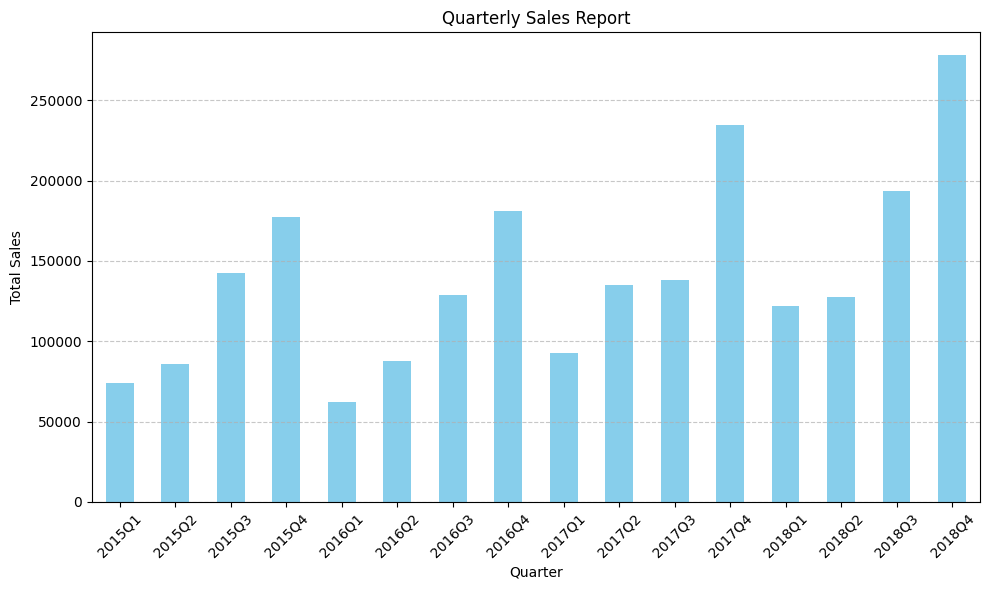

In [5]:

import matplotlib.pyplot as plt


# Assuming your dataset contains columns named 'purchase_date' and 'sales_amount'

# Convert purchase_date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Extract quarter information
data['quarter'] = data['Order Date'].dt.to_period('Q')

# Group the data by quarter and calculate the total sales for each quarter
quarterly_sales_report = data.groupby('quarter')['Sales'].sum()

# Plot the quarterly sales report
plt.figure(figsize=(10, 6))
quarterly_sales_report.plot(kind='bar', color='skyblue')
plt.title('Quarterly Sales Report')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Product Type Sales: Current Year vs. Previous Year CATEGORY WISE**

<Figure size 1000x600 with 0 Axes>

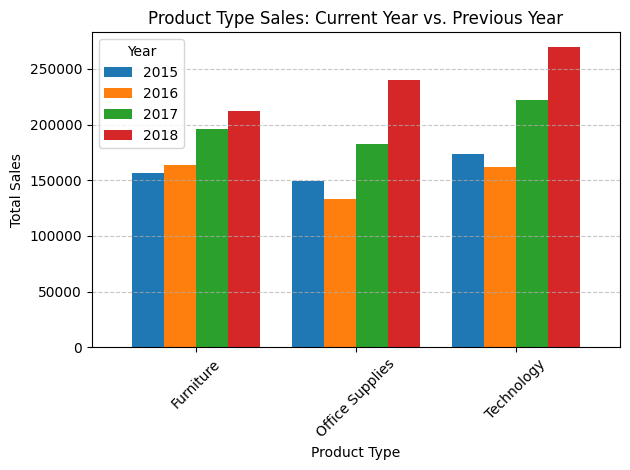

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Extract year from purchase_date
data['year'] = data['Order Date'].dt.year

# Group the data by product type and year, and calculate total sales for each group
sales_by_product_year = data.groupby(['Category', 'year'])['Sales'].sum().unstack()

# Plot the comparison between current year and previous year sales for each product type
plt.figure(figsize=(10, 6))
sales_by_product_year.plot(kind='bar', width=0.8)
plt.title('Product Type Sales: Current Year vs. Previous Year')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Product Type Sales: Current Year vs. Previous Year PRODUCT WISE**

<Figure size 1000x600 with 0 Axes>

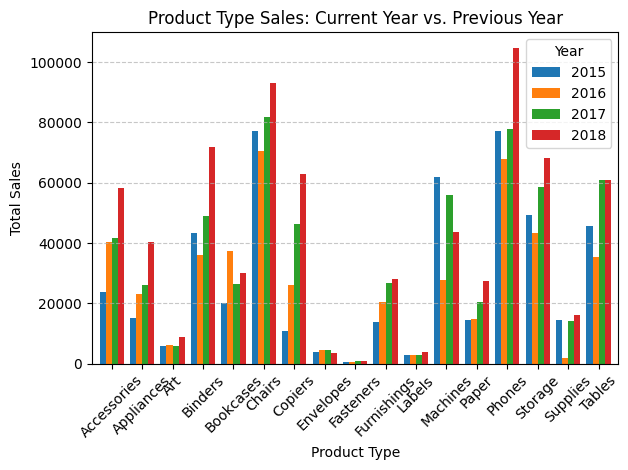

In [7]:

# Group the data by product type and year, and calculate total sales for each group
sales_by_product_year = data.groupby(['Sub-Category', 'year'])['Sales'].sum().unstack()

# Plot the comparison between current year and previous year sales for each product type
plt.figure(figsize=(10, 6))
sales_by_product_year.plot(kind='bar', width=0.8)
plt.title('Product Type Sales: Current Year vs. Previous Year')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Ploting the Daily Sale, Monthly and Yearlt sales **

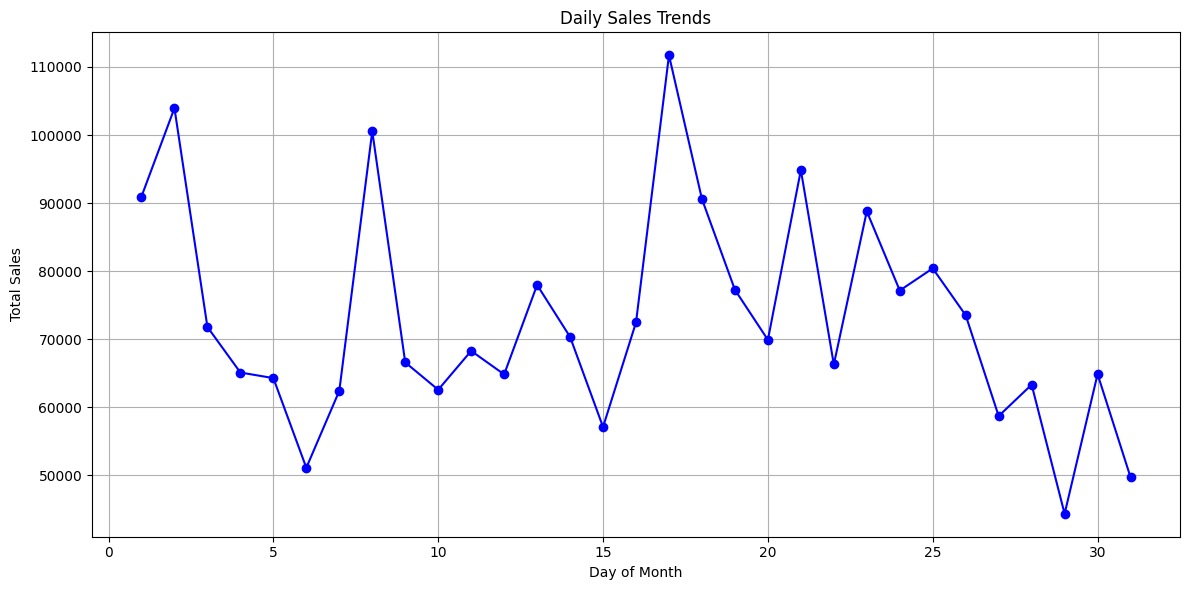

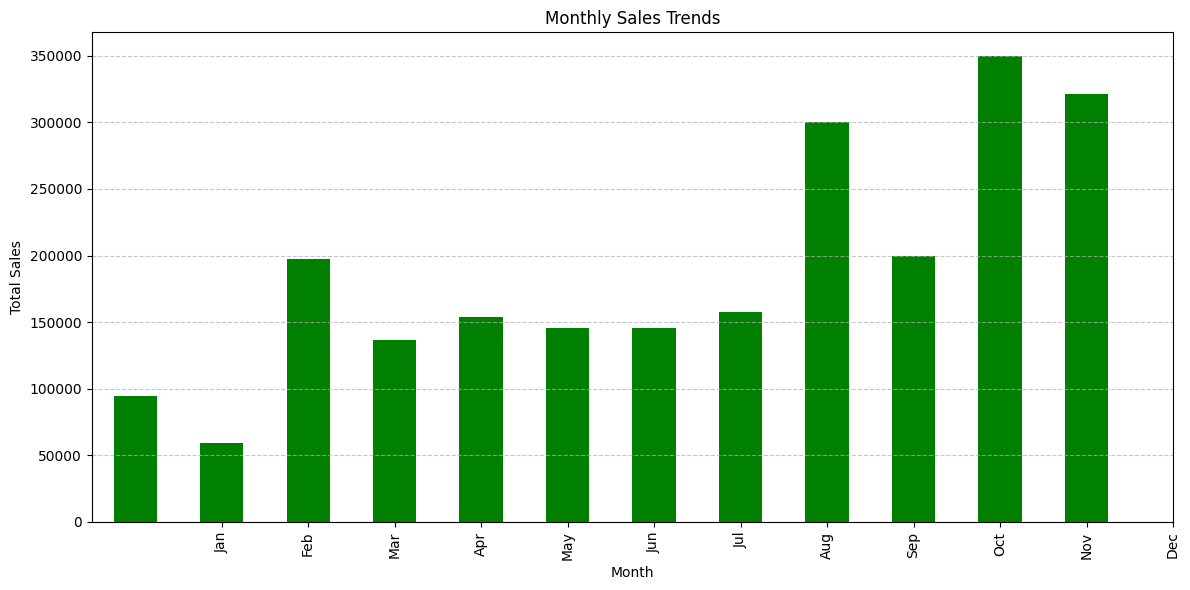

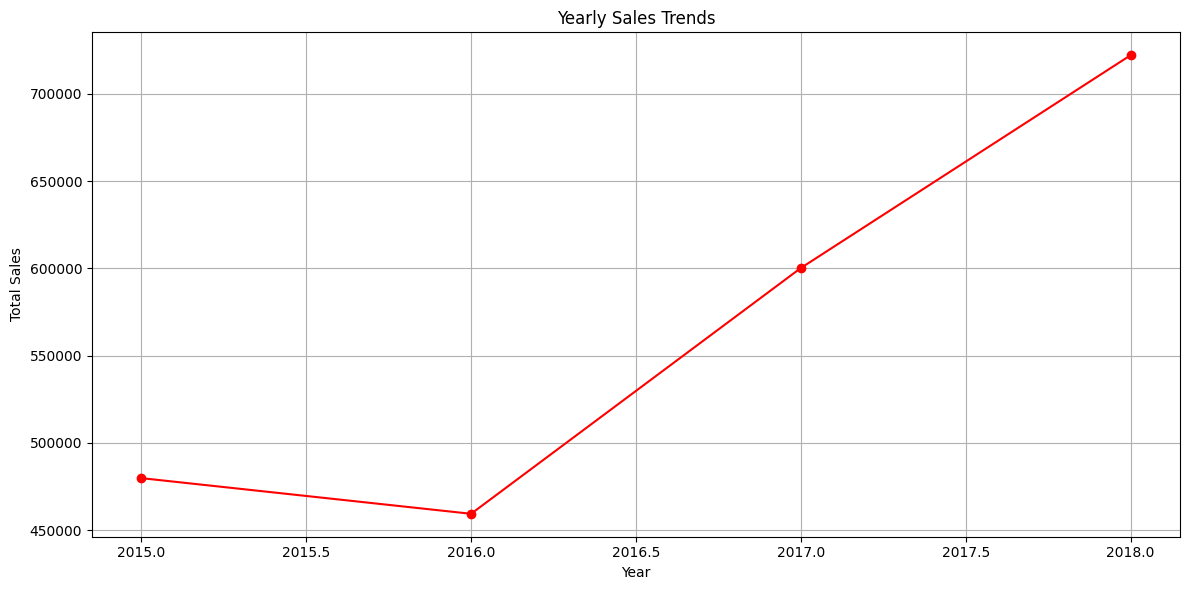

In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Extract year, month, and day from purchase_date
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['day'] = data['Order Date'].dt.day

# Aggregate sales data by day
daily_sales = data.groupby('day')['Sales'].sum()

# Aggregate sales data by month
monthly_sales = data.groupby('month')['Sales'].sum()

# Aggregate sales data by year
yearly_sales = data.groupby('year')['Sales'].sum()

# Plot daily sales trends
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o', color='blue')
plt.title('Daily Sales Trends')
plt.xlabel('Day of Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot yearly sales trends
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', marker='o', color='red')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


**During the project completion, I came across two of the python libraries seasonal_decompose, and statsmodels.tsa.seasonal which help us in the  time series decomposition method of analysis and  it can help with forecasting.It can automatically decompose time series data in Python.Also to decompose additive and multiplicative time series problems and plot the results.**

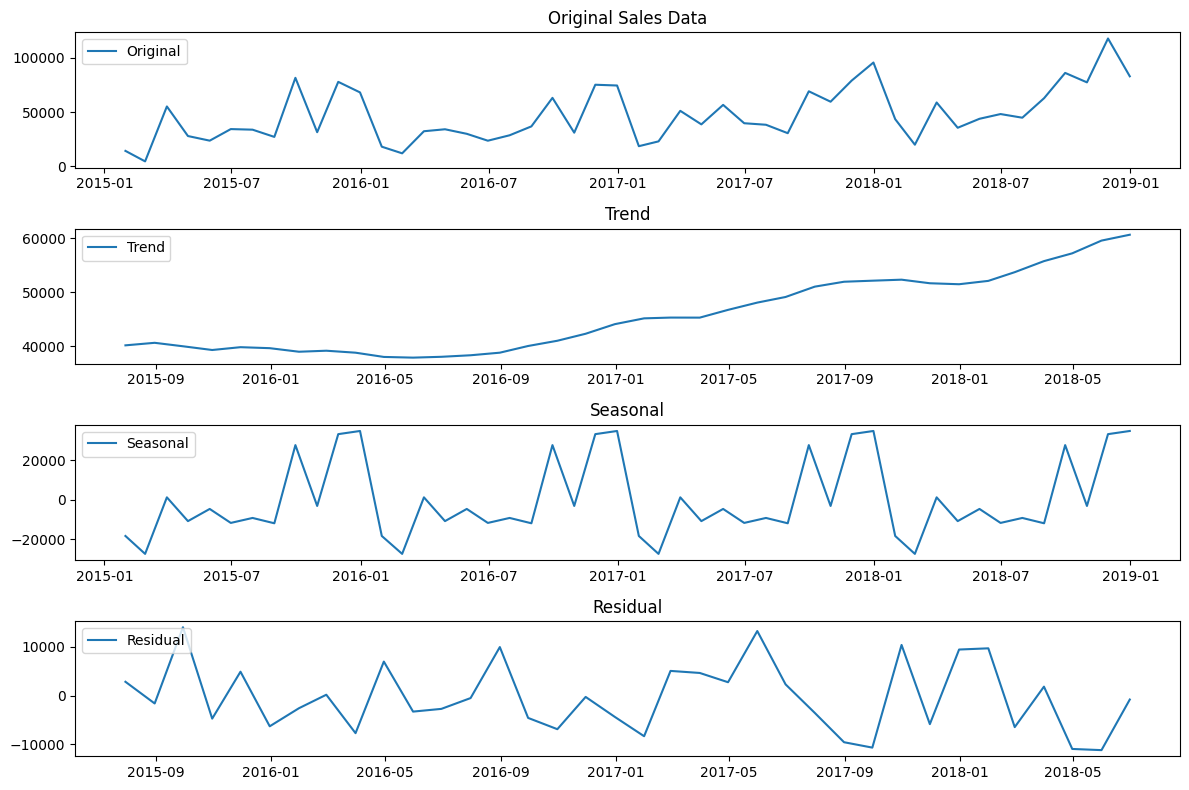

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the uploaded dataset into a DataFrame


# Convert order date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Set purchase_date as the index
data.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and calculate the total sales for each month
monthly_sales = data['Sales'].resample('M').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the original sales data, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='upper left')
plt.title('Original Sales Data')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()


**Getting the Top selling product and the categories from the Dataset**

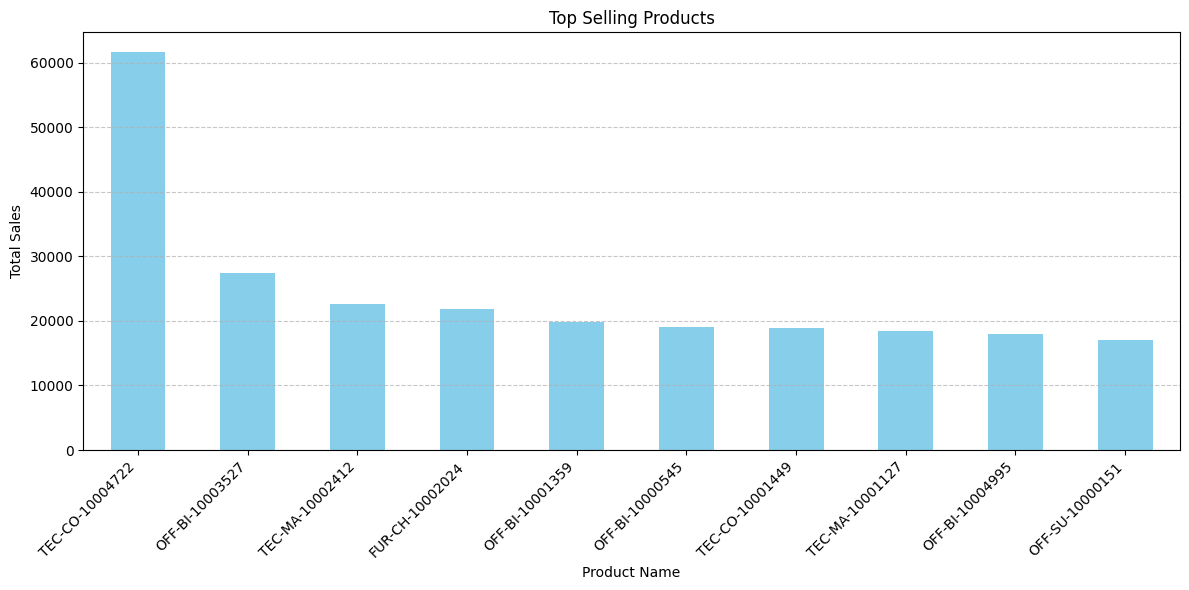

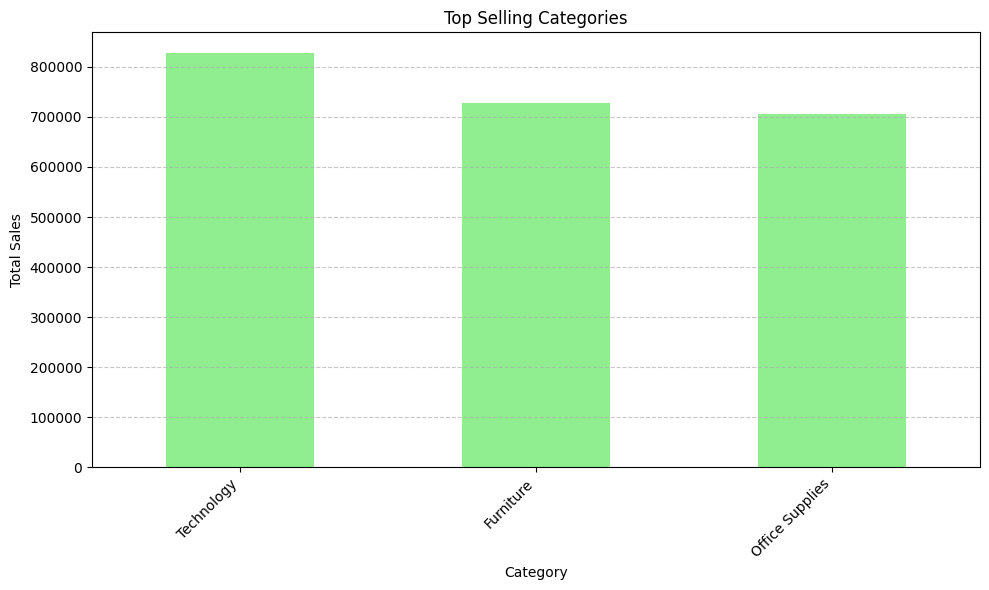

In [10]:
product_sales = data.groupby('Product ID')['Sales'].sum()

# Group the data by category and calculate total sales for each category
category_sales = data.groupby('Category')['Sales'].sum()

# Identify the top-selling products and categories
top_selling_products = product_sales.nlargest(10)  # Get the top 10 selling products
top_selling_categories = category_sales.nlargest(5)  # Get the top 5 selling categories

# Plot top selling products
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot top selling categories
plt.figure(figsize=(10, 6))
top_selling_categories.plot(kind='bar', color='lightgreen')
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()